<h1 style ="text-align: center;">TCS STOCK PRICE PREDICTION</h1>

## 1. Loading Data

In [3]:
# importing liraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# reading dataset
data = pd.read_csv("TCS Historical Data.csv")
data

,Unnamed: 0,Date,Price,Open,High,Low,Volume,Change(%)
0,0,09 Oct 2024,4252.95,4260.0,4295.00,4246.70,1082504,-0.01%
1,1,08 Oct 2024,4253.25,4272.6,4279.40,4203.95,1541867,-0.46%
2,2,07 Oct 2024,4272.85,4273.9,4297.25,4229.40,1472619,0.48%
3,3,04 Oct 2024,4252.25,4225.0,4298.00,4224.05,2965463,0.46%
4,4,03 Oct 2024,4232.75,4262.6,4279.00,4210.00,3350119,-1.29%
...,...,...,...,...,...,...,...,...
1236,1236,18 Oct 2019,2057.35,2037.5,2063.90,2025.00,3087901,1.30%
1237,1237,17 Oct 2019,2030.95,2014.0,2038.00,1999.30,3818774,-0.75%
1238,1238,16 Oct 2019,2046.40,2038.0,2056.00,2016.00,3034082,0.45%
1239,1239,15 Oct 2019,2037.30,2032.0,2047.00,2022.70,2261310,0.81%


#### Reversing the dataset

In [6]:
data = data.iloc[::-1].reset_index(drop=True)
data.head()

,Unnamed: 0,Date,Price,Open,High,Low,Volume,Change(%)
0,1240,14 Oct 2019,2021.00,1995.0,2032.75,1968.0,3510704,1.72%
1,1239,15 Oct 2019,2037.30,2032.0,2047.00,2022.7,2261310,0.81%
2,1238,16 Oct 2019,2046.40,2038.0,2056.00,2016.0,3034082,0.45%
3,1237,17 Oct 2019,2030.95,2014.0,2038.00,1999.3,3818774,-0.75%
4,1236,18 Oct 2019,2057.35,2037.5,2063.90,2025.0,3087901,1.30%


#### Data Filteration

In [9]:
data = data.drop("Unnamed: 0",axis = 1)
data

,Date,Price,Open,High,Low,Volume,Change(%)
0,14 Oct 2019,2021.00,1995.0,2032.75,1968.00,3510704,1.72%
1,15 Oct 2019,2037.30,2032.0,2047.00,2022.70,2261310,0.81%
2,16 Oct 2019,2046.40,2038.0,2056.00,2016.00,3034082,0.45%
3,17 Oct 2019,2030.95,2014.0,2038.00,1999.30,3818774,-0.75%
4,18 Oct 2019,2057.35,2037.5,2063.90,2025.00,3087901,1.30%
...,...,...,...,...,...,...,...
1236,03 Oct 2024,4232.75,4262.6,4279.00,4210.00,3350119,-1.29%
1237,04 Oct 2024,4252.25,4225.0,4298.00,4224.05,2965463,0.46%
1238,07 Oct 2024,4272.85,4273.9,4297.25,4229.40,1472619,0.48%
1239,08 Oct 2024,4253.25,4272.6,4279.40,4203.95,1541867,-0.46%


In [13]:
data.isnull().sum()

Date         0
Price        0
Open         0
High         0
Low          0
Volume       0
Change(%)    0
dtype: int64

In [15]:
data.describe()

,Price,Open,High,Low,Volume
count,1241.000000,1241.000000,1241.000000,1241.000000,1.241000e+03
mean,3204.459025,3205.377276,3235.968131,3173.959347,2.742166e+06
std,652.701733,652.659329,654.274260,650.743038,1.702145e+06
min,1636.350000,1559.700000,1685.450000,1506.050000,6.505700e+04
25%,2958.450000,2960.000000,3019.700000,2926.100000,1.682889e+06
50%,3301.900000,3304.000000,3327.950000,3271.000000,2.291562e+06
75%,3632.600000,3640.000000,3662.000000,3601.700000,3.256906e+06
max,4553.750000,4576.000000,4592.250000,4512.000000,1.983983e+07


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1241 non-null   object 
 1   Price      1241 non-null   float64
 2   Open       1241 non-null   float64
 3   High       1241 non-null   float64
 4   Low        1241 non-null   float64
 5   Volume     1241 non-null   int64  
 6   Change(%)  1241 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 68.0+ KB


## 2. Splitting data as Train and Validation

In [10]:
length_data = len(data)
split_ratio = 0.7
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1241
Train data length : 869
Validation data lenth : 372


#### Train data

In [12]:
train_data = data[:length_train].loc[:,['Date','Open']]
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data

,Date,Open
0,2019-10-14,1995.00
1,2019-10-15,2032.00
2,2019-10-16,2038.00
3,2019-10-17,2014.00
4,2019-10-18,2037.50
...,...,...
864,2023-04-03,3224.95
865,2023-04-05,3185.50
866,2023-04-06,3225.00
867,2023-04-10,3220.00


#### Validation data

In [14]:
validation_data = data[length_train:].loc[:,['Date','Open']]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])
validation_data

,Date,Open
869,2023-04-12,3227.95
870,2023-04-13,3210.00
871,2023-04-17,3134.10
872,2023-04-18,3154.95
873,2023-04-19,3130.75
...,...,...
1236,2024-10-03,4262.60
1237,2024-10-04,4225.00
1238,2024-10-07,4273.90
1239,2024-10-08,4272.60


## 3. Creating Train Dataset from Train split

In [16]:
dataset_train = train_data.Open.values
dataset_train.shape

(869,)

In [17]:
# Change 1d array to 2d array
# Changing shape from (869,) to (869,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(869, 1)

## 4. Normalization / Feature Scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)
dataset_train_scaled.shape

(869, 1)

#### Plotting graph

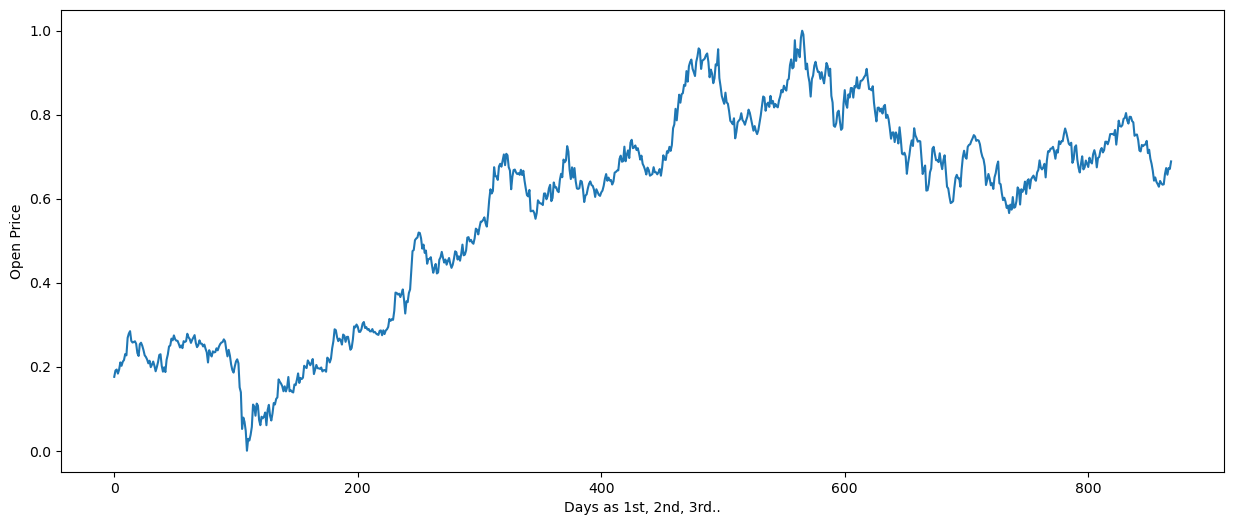

In [21]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

## 5. Creating X_train and y_train from Train data

In [23]:
X_train = []
y_train = []
time_step = 50
for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (819, 50)
Shape of y_train before reshape : (819,)


In [24]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (819, 50, 1)
Shape of y_train after reshape : (819, 1)


In [25]:
X_train[0]

array([[0.1759321 ],
       [0.19088613],
       [0.1933111 ],
       [0.1836112 ],
       [0.19310902],
       [0.21028595],
       [0.20220269],
       [0.2119026 ],
       [0.21594423],
       [0.23008993],
       [0.2270587 ],
       [0.26888956],
       [0.27899363],
       [0.28465191],
       [0.26161463],
       [0.257573  ],
       [0.25878549],
       [0.26060422],
       [0.2545822 ],
       [0.2325149 ],
       [0.22564413],
       [0.25373345],
       [0.25716884],
       [0.25005557],
       [0.23978984],
       [0.22724058],
       [0.22321916],
       [0.21715671],
       [0.20808326],
       [0.21426695],
       [0.19896938],
       [0.20505204],
       [0.21230676],
       [0.20220269],
       [0.18914823],
       [0.19937355],
       [0.21149843],
       [0.22806911],
       [0.22966556],
       [0.20220269],
       [0.18821865],
       [0.19860564],
       [0.18724866],
       [0.21675255],
       [0.22907952],
       [0.24827726],
       [0.2506214 ],
       [0.266

In [26]:
y_train[0]

array([0.26541376])

## 6. Creating RNN Model

In [28]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )
regressor.add(
    Dropout(0.2)
             )

# adding second RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )
regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )
regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50)
             )
regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))
# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.0017 - loss: 0.4216
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.0015 - loss: 0.2923
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 4.0088e-04 - loss: 0.2485
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 5.2610e-04 - loss: 0.2101
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 9.1538e-04 - loss: 0.1530
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.0050 - loss: 0.1465
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.0012 - loss: 0.1251  
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 6.8602e-04 - loss: 0.0937
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.0014 - loss: 0.0814
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.0028 - loss: 0.0718
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 8.2947e-04 - loss: 0.0661
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1

## 7. Evaluating Model

In [30]:
# Losses
history.history["loss"]

[0.38164910674095154,
 0.2585066854953766,
 0.22845453023910522,
 0.19537124037742615,
 0.14577485620975494,
 0.14723816514015198,
 0.11479660123586655,
 0.09307590126991272,
 0.08110030740499496,
 0.06858845055103302,
 0.060900259763002396,
 0.057423755526542664,
 0.05050870031118393,
 0.045874979346990585,
 0.04268966615200043,
 0.03984116390347481,
 0.033898595720529556,
 0.03390625864267349,
 0.03068596124649048,
 0.02694907784461975,
 0.023661190643906593,
 0.023517822846770287,
 0.020691512152552605,
 0.022206705063581467,
 0.020939283072948456,
 0.01775183714926243,
 0.018044641241431236,
 0.0161912739276886,
 0.016941269859671593,
 0.016159817576408386,
 0.013926553539931774,
 0.01278274692595005,
 0.012839439325034618,
 0.01267809234559536,
 0.012862754054367542,
 0.010468597523868084,
 0.010584994219243526,
 0.011587994173169136,
 0.010399533435702324,
 0.010172062553465366,
 0.00959101878106594,
 0.009566646069288254,
 0.008467944338917732,
 0.008424662984907627,
 0.00845358

#### Plotting data on graph

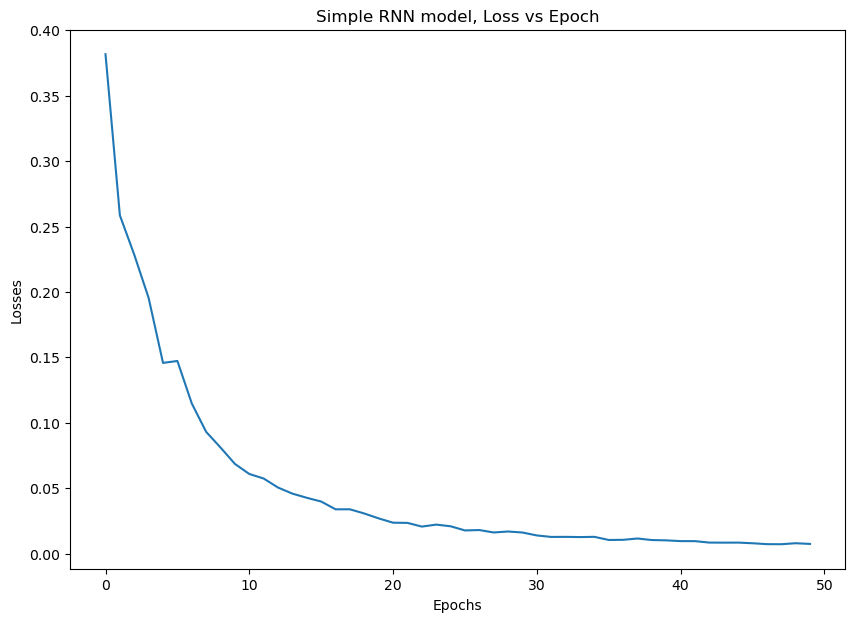

In [32]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

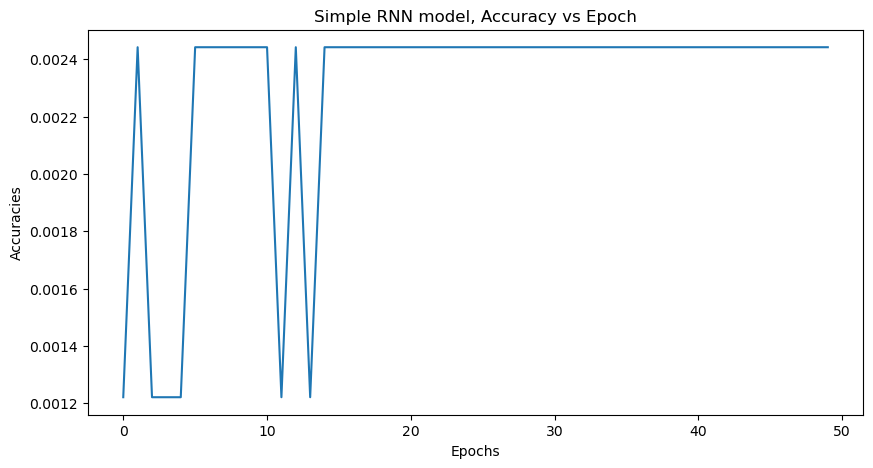

In [33]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

#### Predicting the data using RNN Model

In [35]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step


(819, 1)

In [36]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(819, 1)

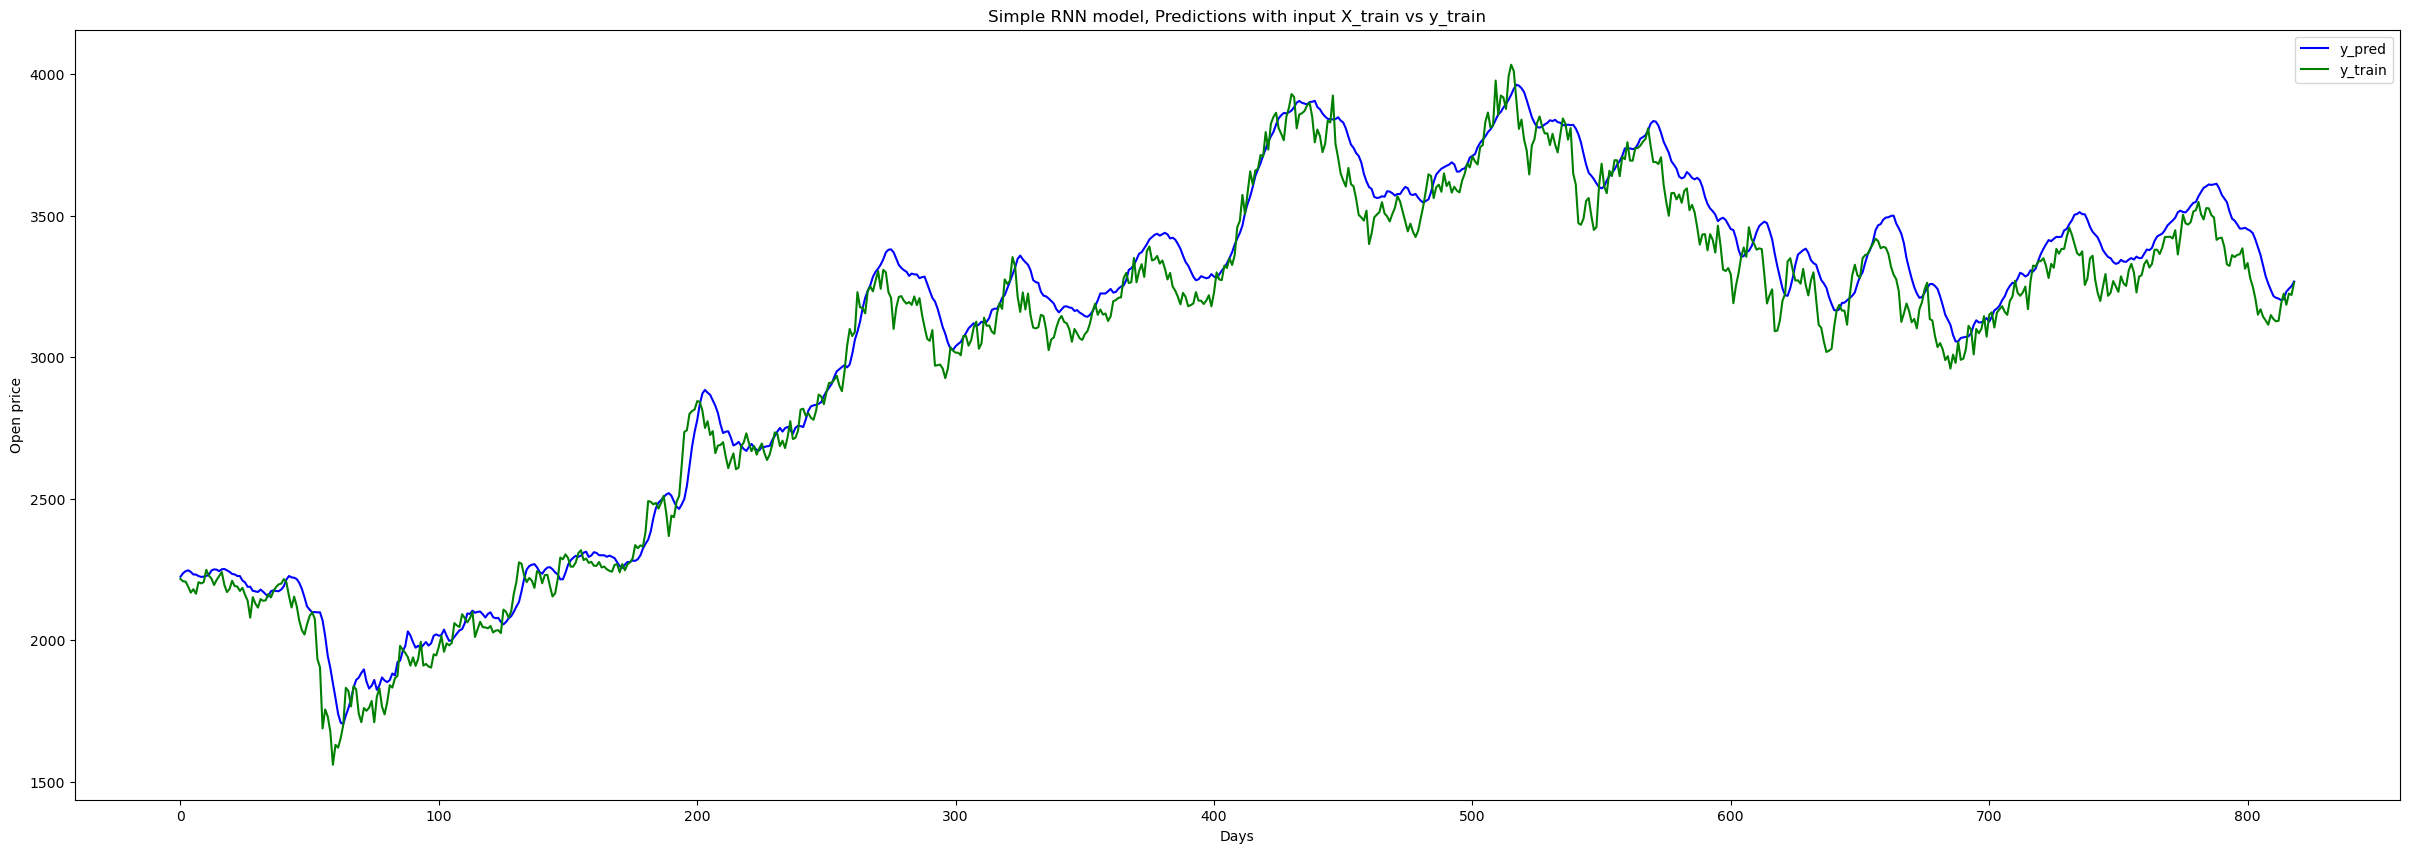

In [37]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()


## 8. Creating Test Dataset from Validation Data

In [39]:
dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (372, 1)


In [40]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (322, 50)
Shape of y_test before reshape : (322,)


In [41]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (322, 50, 1)
Shape of y_test after reshape : (322, 1)


## 9. Evaluating with Validation Data

In [43]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Shape of y_pred_of_test : (322, 1)


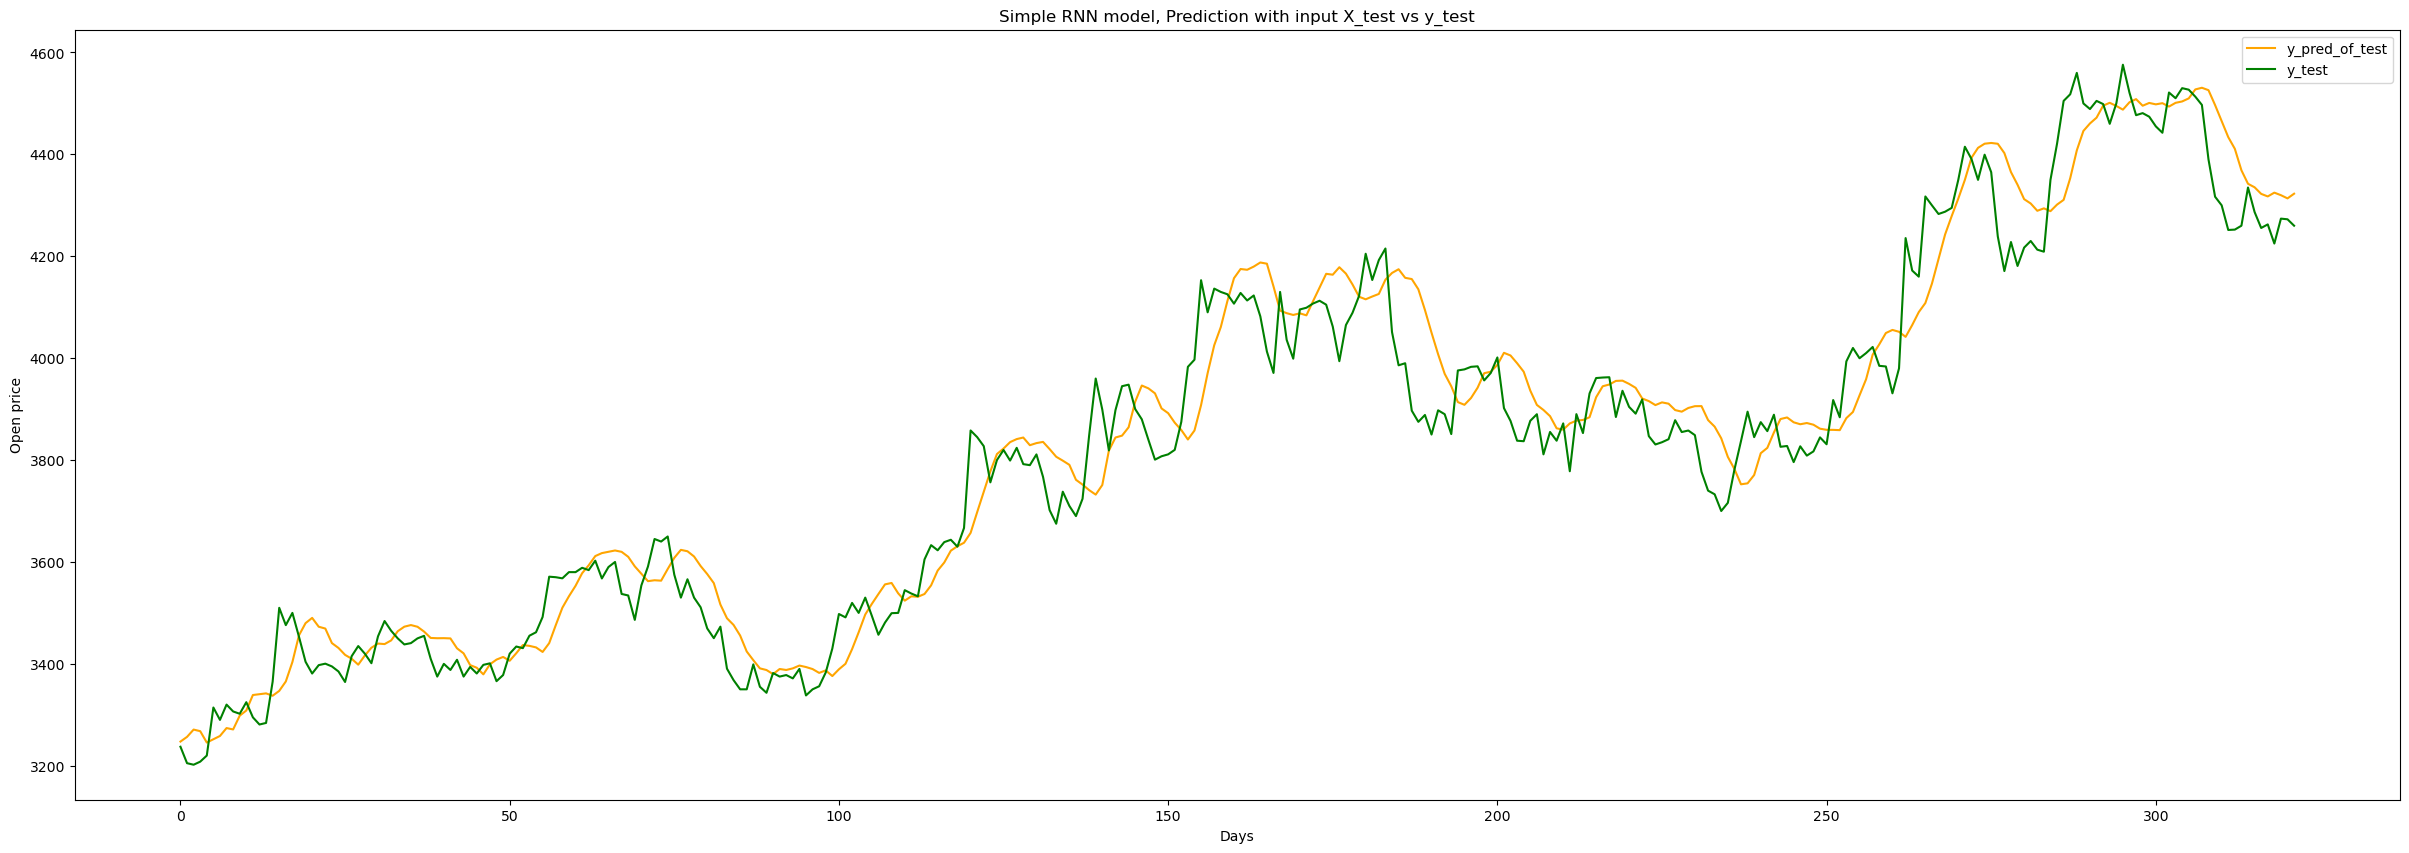

In [44]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

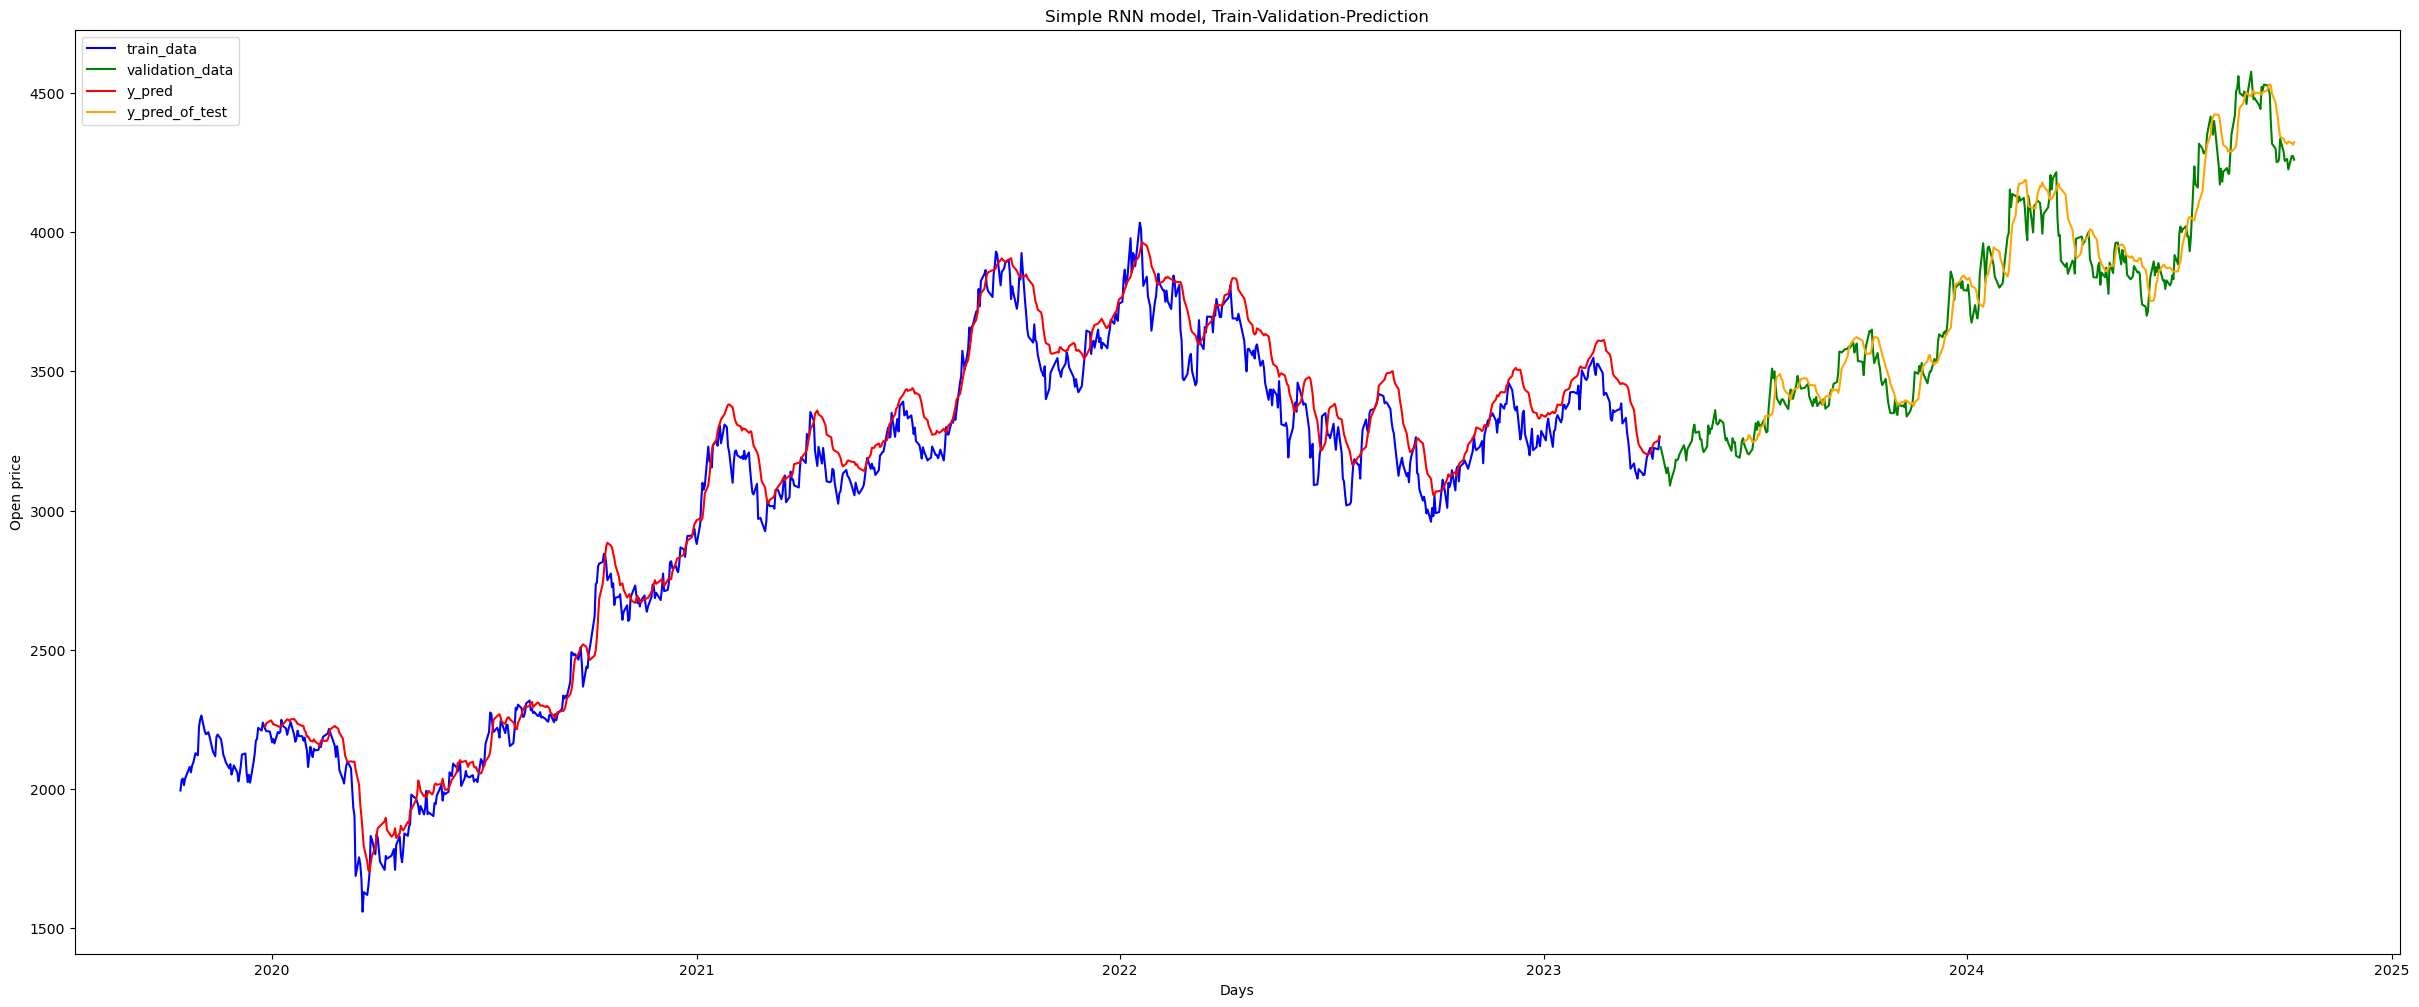

In [45]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

In [46]:
y_train = scaler.fit_transform(y_train)

## 10. Creating LSTM Model

In [48]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)


Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.0027 - loss: 0.0491
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 7.7714e-04 - loss: 0.0019
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.0053 - loss: 0.0021
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 1.0365e-04 - loss: 0.0019
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 7.7631e-04 - loss: 0.0014
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.0018 - loss: 0.0014
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.0036 - loss: 0.0014
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.0012 - loss: 0.0012
Epoch 9/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.0062 - loss: 0.0011
Epoch 10/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 6.8083e-04 - loss: 0.0011


## 11. Evaluating LSTM Model

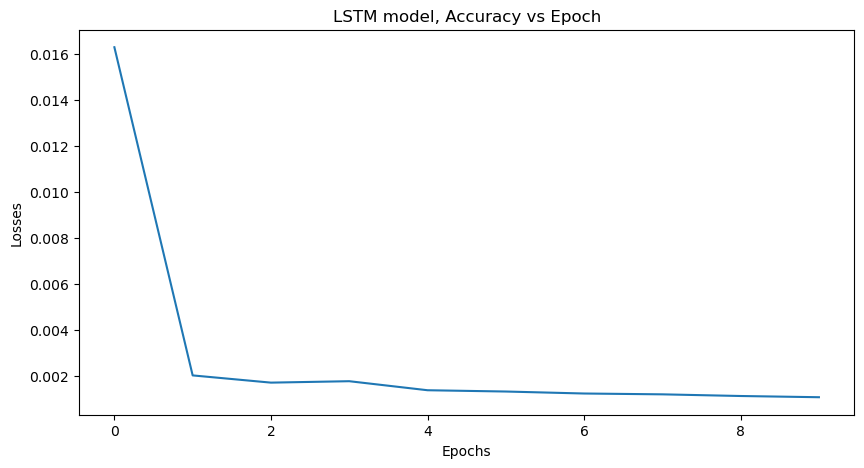

In [50]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step


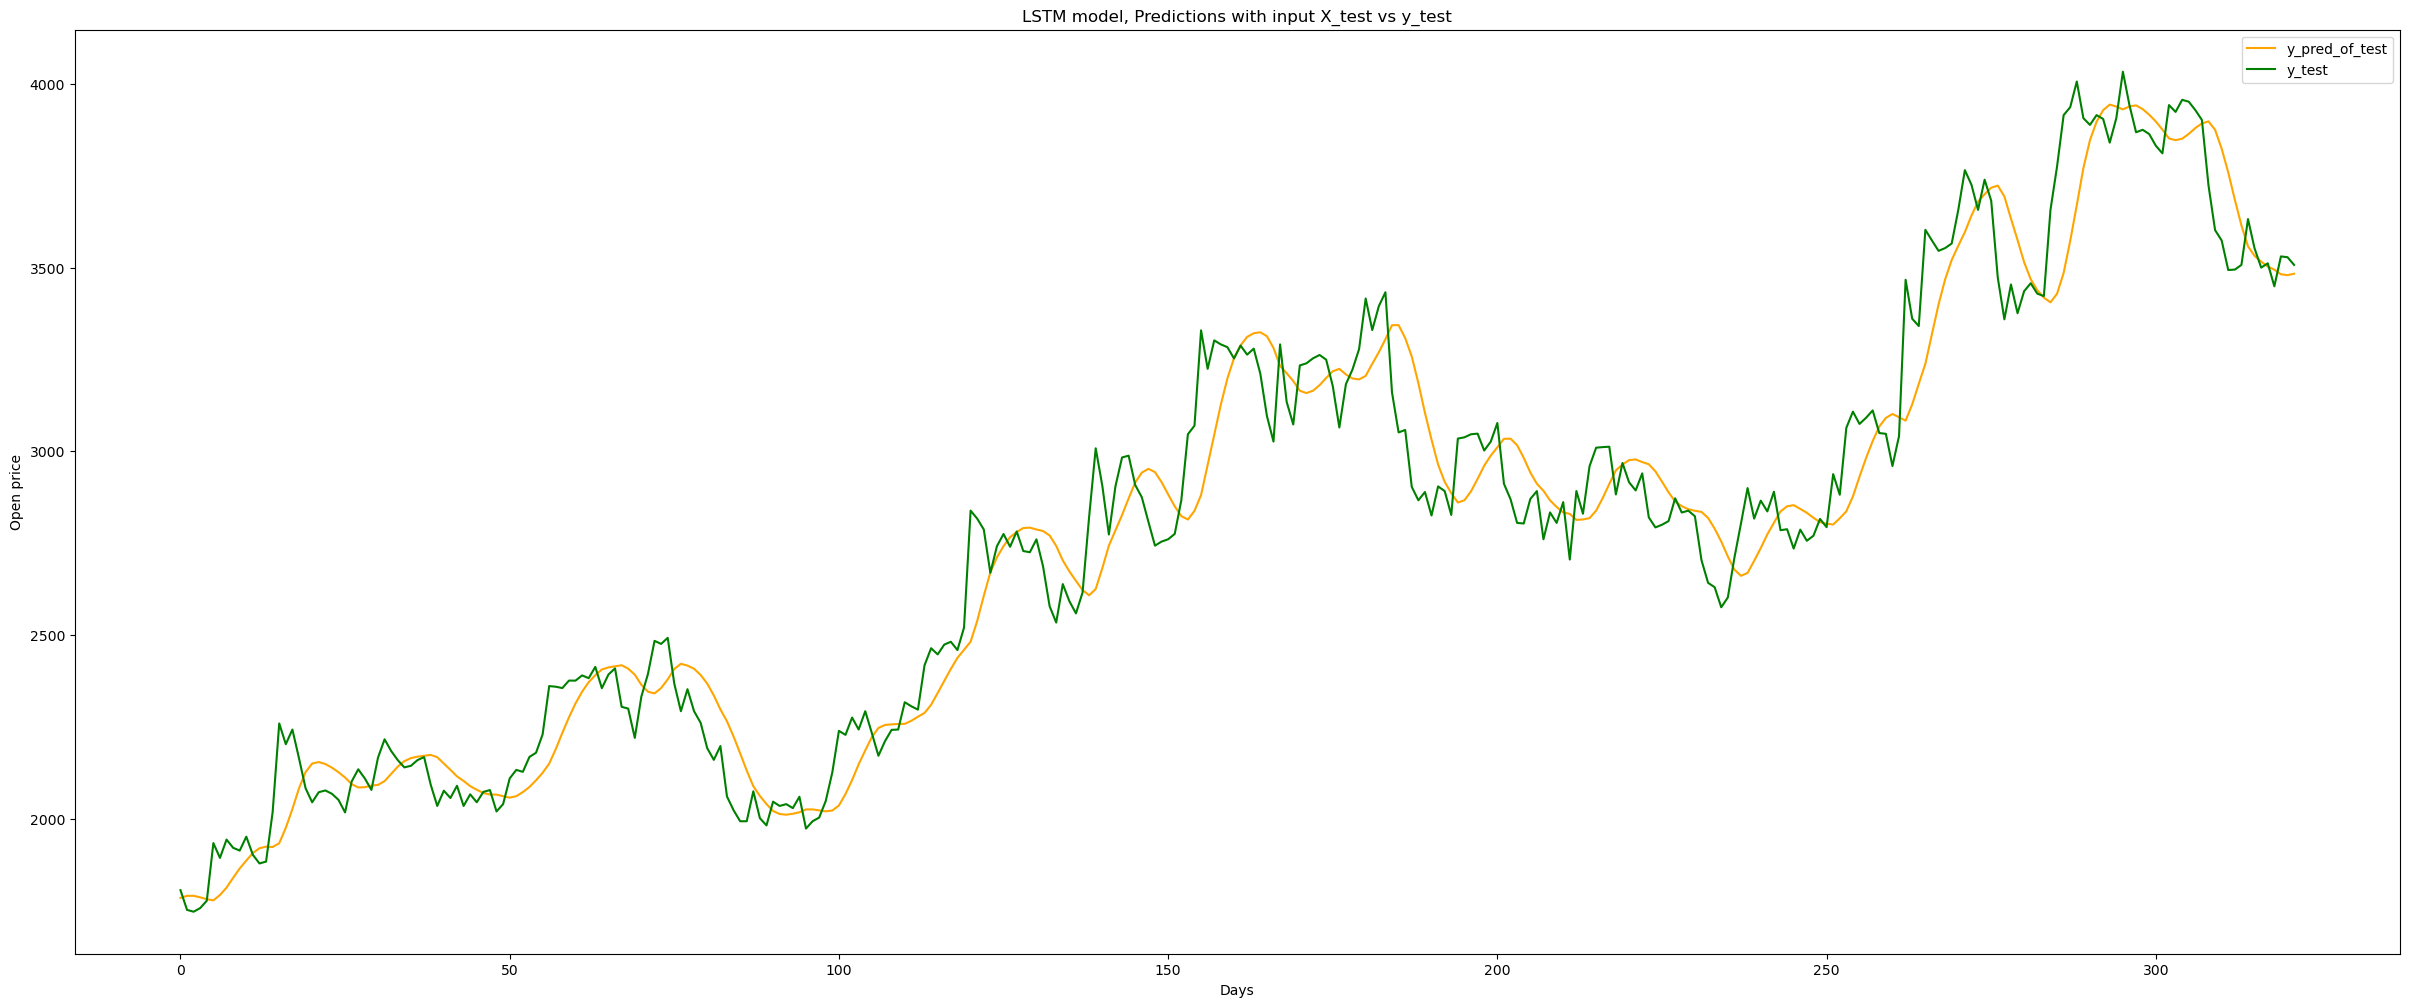

In [51]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [52]:
data.iloc[-1]

Date         09 Oct 2024
Price            4252.95
Open              4260.0
High              4295.0
Low               4246.7
Volume           1082504
Change(%)         -0.01%
Name: 1240, dtype: object

In [53]:
X_input = data.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.54351315],
        [0.44204419],
        [0.56400444],
        [0.47907666],
        [0.16800395],
        [0.        ],
        [0.14084681],
        [0.02481175],
        [0.11368967],
        [0.14578447],
        [0.10381434],
        [0.09393902],
        [0.44204419],
        [0.61733119],
        [0.824713  ],
        [0.8568078 ],
        [0.9604987 ],
        [0.81236884],
        [0.7852117 ],
        [0.824713  ],
        [0.8092828 ],
        [0.7136156 ],
        [0.81236884],
        [1.        ],
        [0.86433774],
        [0.75546229],
        [0.76546105],
        [0.7480558 ],
        [0.70127145],
        [0.67028762],
        [0.86532527],
        [0.83767436],
        [0.88643377],
        [0.87902728],
        [0.84508085],
        [0.80508579],
        [0.54092087],
        [0.36032589],
        [0.31860264],
        [0.19923466],
        [0.20096284],
        [0.2198494 ],
        [0.40501173],
        [0.28626096],
        [0.2088631 ],
        [0

## 12. Future Price Prediction using RNN, LSTM Models

In [55]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for 10/10/2024      :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 10/10/2024 :", LSTM_prediction[0,0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Simple RNN, Open price prediction for 10/10/2024      : 4284.7554
LSTM prediction, Open price prediction for 10/10/2024 : 4253.019


## 13. Conclusion
In this project, we developed a Stock Price Prediction System using historical data and machine learning techniques. Our model was trained on stock price data from Tata Consultancy Services (TCS) with the goal of accurately forecasting future prices. By increasing the time step for more accurate multi-day forecasts, the model provided reliable predictions over a period of 50 days. The project demonstrates the effectiveness of using machine learning algorithms to model complex financial data and offers valuable insights for stock price analysis.

Future Work
Although the current implementation achieved promising results, several areas for further improvement and exploration remain:

**Dataset Expansion:** Incorporating data from other companies and industries can make the model more robust and provide a broader understanding of market trends.\
**Algorithm Optimization:** Exploring more advanced machine learning models, such as Reinforcement Learning, could improve the prediction accuracy.\
**Real-time Data Integration:** Incorporating real-time stock data using APIs can enable dynamic predictions, making the system more practical for real-world applications.\
**User Interface Development:** A user-friendly web interface could make the system more accessible to non-technical users, allowing them to input stock tickers and view predictions easily.\
**Deployment:** Deploying the model as a cloud-based service can make it scalable and accessible for end-users to use in real-time.\
References
Stock Data: [TCS Dataset Source](https://www.kaggle.com/datasets/shreyaskeote23/tcs-historical-data)\
Python Libraries: Pandas, NumPy, Scikit-learn, Matplotlib

| Done by                |
|------------------------------|
| [Mohammed Aftaab Shah Hussain](https://www.linkedin.com/in/mohammed-aftaab-shah-hussain-bbba821a0/) |

<h1 style ="text-align: center;">Thank You</h1>